# Minimizing the cross entropy : a nice trip from Maximum likelihood to Kullback–Leibler divergence

The learning algorithm is often stated as a minimization problem where the objective function represent the goal to be reached. The objective function is also called loss function or cost function in machine learning. 

### We show that minimizing the cross entropy is equivalent to maximizing the likelihood in case of discriminative models.
### We show that minimizing the cross entropy is equivalent to minimizing the Kullback–Leibler divergence

### We show that the cross entropy loss makes the logistic regression problem convex
### We present an application cats and dogs image classification




# References : 
### Book: Pattern Recognition and Machine Learning by Christopher M. Bishop, 2006
### A nice blog on cross entropy :  https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/
## An introduction to probabilities is given there 
http://romain.raveaux.free.fr/document/NaiveBayesClassifier.html

## An introduction to maximum likelihood
http://romain.raveaux.free.fr/document/Overfittingbiaisedandunbiaisedvariance.html



# Discriminative and Generative models

In particular, we distinguish between generative models and discriminative models.
For generative models, we build a probability model of the data and parameterize
it by the scene content. For discriminative models, we build a probability model
of the scene content and parameterize it by the data.

Models relating the data $x$ to the target $t$ fall into one of two categories. We either:
1. model the contingency of the target state on the data $Pr(t|x)$ or
2. model the contingency of the data on the world state $Pr(x|t)$.

The first type of model is termed discriminative. The second is termed generative;

The target $t$ can be a class label ("cat") if we are dealing with a classification problem.

1. In the discriminative model, we choose an appropriate form for the distribution $Pr(t)$
over the target state. The models may also depends on a set of parameters $W$.
Since the distribution over the state depends on both the data and these parameters,
we write it as $Pr(t|x,W)$ and refer to it as the posterior distribution.
The goal of the learning algorithm is to fit the parameters $W$ using paired training
data $\{x_i,t_i\}_{i=1}^M$. This can be done using the maximum likelihood (ML), maximum
a posteriori (MAP), or Bayesian approaches.

2. In the generative model, we choose the form for the distribution $Pr(x)$ over the data. The generative model can depend on parameters, it as $Pr(x|t,W)$ and refer to it as the $likelihood$. In inference, we aim to compute the posterior distribution $Pr(t|x)$. To this end we specify a prior $Pr(w)$ over the target state and then use Bayes' rule.

# Recall : Expectation
One of the most important operations involving probabilities is that of finding weighted averages of functions. The average value of some function $f(t)$ under a probability distribution $Pr(t)$ is called the expectation of $f(t)$ and will be denoted by
$\mathbb{E}[f]$. For a discrete distribution, it is given by
$$\mathbb{E}[f]=\sum_x Pr(t)f(t)  $$
so that the average is weighted by the relative probabilities of the different values
of t. $t$ can be a finite set i.e. $t=\{0,1 \}$

In either case, if we are given a finite number N of points drawn from the probability
distribution or probability density, then the expectation can be approximated as a
$$\mathbb{E}[f]\approx\frac{1}{N}  \sum_{i=1}^N f(t_i)$$
The approximation becomes exact in the limit $N\to \infty$

# Recall : Entropy

We begin by considering a discrete random variable $t$ and we ask how much information is received when we observe a specific value for this variable. The amount of information can be viewed as the ‘degree of surprise’ on learning the value of $t$. If we are told that a highly improbable event has just occurred, we will have received more information than if we were told that some very likely event has just occurred, and if we knew that the event was certain to happen we would receive no information. Our measure of information content will therefore depend on the probability distribution $Pr(t)$, and we therefore look for a quantity $h(t)$ that is a monotonic function of the probability $Pr(t)$ and that expresses the information content. The form of h(·) can be found by noting that if we have two events $t$ and $\hat{t}$ that are unrelated, then the information gain from observing both of them
should be the sum of the information gained from each of them separately, so that $h(t, \hat{t}) = h(t) + h(\hat{t})$. Two unrelated events will be statistically independent and so $Pr(t, \hat{t}) = Pr(t)Pr(\hat{t})$. From these two relationships, it is easily shown that $h(t)$ must be given by the logarithm of Pr(t) and so we have
$$h(t)=-\log_2 Pr(t) $$

where the negative sign ensures that information is positive or zero. Note that low probability events t correspond to high information content. The choice of basis for the logarithm is arbitrary, and for the moment we shall adopt the convention
prevalent in information theory of using logarithms to the base of 2. In this case, as we shall see shortly, the units of $h(t)$ are bits (‘binary digits’). Now suppose that a sender wishes to transmit the value of a random variable to a receiver. The average amount of information that they transmit in the process is obtained by taking the expectation of with respect to the distribution $Pr(t)$ and is given by
$$H(t)=-\sum_{t \in \mathcal{T}} Pr(t) \log_2(Pr(t)) $$
Where $\mathcal{T}$ is the domain of definition of $t$ i.e $t \in \{0,1\}$.

This important quantity is called the entropy of the random variable $t$. Note that $\lim_{Pr \to 0} \log Pr = 0$ and so we shall take $Pr(t) \log Pr(t) = 0$ whenever we encounter a value for $t$ such that $Pr(t) = 0$.

# Introducing the Cross-entropy loss

This paragraph describes how minimizing the cross-entropy is related with maximizing the likelihood of the model according to the training set.

When we develop a model for classification, we aim to map the model's inputs to targets. The targets can be encoded by integers or by an encoding called one-hot vector. For example, if we're interested in determining whether an image is best described as a landscape or as a house or car. The target of the first sample $t_1$ can be represented as $t_1 \in [1,2,3]$ or $t_1\in \{0,1\}^3$. If an image is a house then $t_1=[1,0,0]$. A prediction made by the classifier could be $\hat{t}_1=[0.2,0.3,0.5 ]$. The notation $\hat{t}_1^1$ refers to the first value of the vector $\hat{t}_1$.

In cross-entropy there is entropy. The entropy of the discrete random variable $t_1$ is defined as :  
$$H(t_1) = \sum_i Pr(t_1^i) \log_2 \frac{1}{Pr(t_1^i)} = -\sum_i Pr(t_1^i) \log_2 Pr(t_1^i)$$
If we assume that $t_1^i$ is already a probability then :
$$H(t_1) = \sum_i t_1^i \log_2 \frac{1}{t_1^i} = -\sum_i t_1^i \log_2 t_1^i$$
The entropy measures the number of bits needed to encode the classes of $t_1$.
In contrast, the cross entropy is the number of bits we need if we encode classes from $t_1$ using $\hat{t}_1$. 
$$H(t_1, \hat{t}_1) = \sum_i t_1^i \log_2 \frac{1}{\hat{t}_1^i} = -\sum_i t_1^i \log_2 \hat{t}_1^i$$
Cross-entropy is always larger than entropy; encoding classes according to the wrong distribution $\hat{t}_1$  will always make us use more bits. The only exception is the trivial case where  $t_1$  and  $\hat{t}_1$ are equal, and in this case entropy and cross entropy are equal.
The Kullback–Leibler (KL) divergence from  $\hat{t}_1$ to $t_1$ is simply the difference between cross-entropy and entropy:
\begin{equation}
KL(t_1~||~\hat{t}_1)
= \sum_i t_1^i \log \frac{1}{\hat{t}_1^i} - \sum_i t_1^i \log \frac{1}{t_1^i}
= \sum_i t_1^i \log \frac{t_1^i}{\hat{t_1}^i}
\end{equation}

It measures the number of extra bits we'll need on average if we encode classes from $t_1$  according to  $\hat{t}_1$.

It's never negative, and it's 0 only when  $t_1$ and $\hat{t}_1$ are the same.

Note that minimizing cross entropy is the same as minimizing the KL divergence from $\hat{t}_1$ to $t_1$. 

Now we can use the cross entropy over all training examples as our loss. In particular, if we let $n$ index training examples, the overall loss would be
$$H(t, \hat{t}) = \sum_{n=1}^M H(t_n, \hat{t}_n)$$

We have define the cross entropy, and it seems quite relevant but is there any reason?

# The cross entropy, a probabilistic reasoning
But let's look at another approach.
What if we want our objective function to be a direct measure of our model's predictive power, at least with respect to our training data? One common approach is to tune our parameters so that the likelihood of our data under the model is maximized. 
$$\max Pr(t|\hat{t})$$

We usually assume that our samples are independent and identically distributed (iid), each measure is independent from the other, so, the likelihood over all of our examples decomposes into a product over the likelihoods of individual examples:
$$\max Pr(t|\hat{t})= \Pi_{n=1}^M \; \max \; Pr(t_n|\hat{t}_n)$$
Going back to the original example, if the first training image is of a landscape, then  $t_{1} = (1.0, 0.0, 0.0)^T$ , which tells us that the likelihood  $Pr(t_{1}, \hat{t}_{1})$ is just the first entry of  $\hat{t}_{1} = (0.2, 0.3, 0.5)^T$, which is  $\hat{t}_{1}^1 = 0.2$.

Let's play a bit with the likelihood expression above.

First, since the logarithm is monotonic, we know that maximizing the likelihood is equivalent to maximizing the log likelihood, which is in turn equivalent to minimizing the negative log likelihood:
$$-\log Pr(t| \hat{t}) = -\sum_{n=1}^M \log Pr(t_{n}| \hat{t}_{n})$$

But from our discussion above, we also know that the log likelihood of $t_n$ is just the log of a particular entry of  $\hat{t}_n$. In fact, it's the entry  $i$  which satisfies $t^i_n=1$. We can therefore rewrite the log likelihood for the $n$-th training example in the following way:
$$\log Pr(t_{n}| \hat{t}_{n}) = \sum_{i=1}^3 t_{n}^i \log \hat{t}_{n}^i$$
which gives us an overall negative log likelihood of
$$- \log Pr(t| \hat{t}) = -\sum_{n=1}^M \sum_{i=1}^3 t_{n}^i \log \hat{t}_{n}^i$$

This is precisely cross entropy, summed over all training examples:
$$- \log Pr(t| \hat{t}) = \sum_{n=1}^M  \big[-\sum_{i=1}^3 t_n^i \log \hat{t}_{n}^i\big] = \sum_{n=1}^M H(t_{n}, \hat{t}_{n})$$

# Wow : Breaking news :  minimizing the cross entropy is equivalent to maximize the likelihood
In the context of a discriminative model for probabilistic classification, minimizing the cross entropy is equivalent to maximize the likelihood of $Pr(t|\hat{t})$ without any assumption on the distributions $t$ and $\hat{t}$ .

# Cross entropy and logistic regression
## The Logistic regression model

$$f_{W}(x,W)=\sigma(x^T.W)$$

Where $\sigma(z)$ is a sigmoid function:
$$\sigma(z)=\frac{1}{1+\exp(-z)}$$

## Learning the parameters of the logistic model
Let us consider a data set $D=\{X,T\}=\{x_i,t_i\}_{i=1}^M  $ with $t_i \in \{0,1\}$ such that we are dealing with a 2-class problem.
For a 2-class problem the cross-entropy can be written as follows:
$$H(t_n,\hat{t_n})=-(t_n \log (\hat{t_n})  +  (1-t_n) \log( 1-\hat{t_n} ))$$
Where $\hat{t_n}$ is :
$$\hat{t_n}=\sigma(x_n^T.W)$$
In the terminology of statistics, this model is known as logistic regression, although it should be emphasized that this is a model for classification rather than regression.
## The optimization problem can then be defined as follows :
$$ \min_W L(D;W)$$
$$ \min_W \dfrac{1}{M}\sum_{n=1}^M L_n(x_n,t_n;W)$$
$$L_n=-(t_n \log (\hat{t_n})  +  (1-t_n) \log( 1-\hat{t_n} ))$$

# Solving the problem 

We are seeking for the minimum of the function $L$ so we need to find where the derivative of the function is equal to zero:
$$\dfrac{\partial L}{\partial W} = 0 $$ 

## Gradient descent method

The problem can be solved by the gradient descent method. 

The goal is to choose the parameter update to comprise a small step in the direction of the negative gradient, so that
$$W^{t+1}=W^{t}-\alpha. \dfrac{\partial L}{\partial W}$$
where the parameter $\alpha > 0$ is known as the learning rate.

## Gradient computation

Let us say that we search for : $\dfrac{\partial L}{\partial W_0} $

$L$ is composition of functions then the derivative is based on the chaine rule :
Let $q(p(W_0))$ then 
$$\dfrac{\partial q}{\partial W_0} = \dfrac{\partial q}{\partial p} \dfrac{\partial p}{\partial W_0}$$ 
In addition, the derivative of $log(x)$ is equal to $\dfrac{\partial log(x)}{\partial x} =\dfrac{1}{x}$.

The deriative of $\sigma(x)$  is $\dfrac{\partial \sigma(x)}{\partial x} =\sigma(x) . (1-\sigma(x))$.

**Partial derivative**

1. $q_1=L_n=-(t_n \log (\hat{t_n})  +  (1-t_n) \log( 1-\hat{t_n} ))$ et $p_1=\hat{t_n}$ so $q_1=-(t_n \log (p_1)  +  (1-t_n) \log( 1-p_1) )$  

2. $\dfrac{\partial q_1}{\partial W_0} = \dfrac{\partial q_1}{\partial p_1} \dfrac{\partial p_1}{\partial W_0}=(-\dfrac{t_i}{\hat{t_n}}+\dfrac{1-t_n}{1-\hat{t_n}})\dfrac{\partial p_1}{\partial W_0}$

3. $q_2=\hat{t_n}=sigmoid(z_n)$ and $p_2=z_n$ so $q_2=sigmoid(z_n)$  

4. $\dfrac{\partial q_2}{\partial W_0} = \dfrac{\partial q_2}{\partial p_2} \dfrac{\partial p_2}{\partial W_0}=sigmoid(z_n)*(1-\sigma(z_n)) \dfrac{\partial p_2}{\partial W_0}$

5. $q_3=z_i$ et $p_3=z_n=X_{i,0}*W_0+x_{n}*W_1$ donc $q_3=p3$  
8. $\dfrac{\partial q_3}{\partial W_0} = \dfrac{\partial p_3}{\partial W_0}$=$x_{n}$

Finally,
$$\dfrac{\partial L_n}{\partial W_0}= (-\dfrac{t_n}{\hat{t_n}}+\dfrac{1-t_n}{1-\hat{t_n}}) (\sigma(z_n)*(1-\sigma(z_n)))x_{n}$$
$$\dfrac{\partial L_n}{\partial W_0}= (-\dfrac{t_n}{\hat{t_n}}+\dfrac{1-t_n}{1-\hat{t_n}}) (\hat{t_n}*(1-\hat{t_n}))x_{n}$$

$$\dfrac{\partial L_n}{\partial W_0}= (\hat{t_n} -t_n)  x_{n}$$

The matrix version is : 

$$\dfrac{\partial L}{\partial W}= X^T(\hat{T} -T)  $$

# Breaking news : A word on the gradient

We see that the factor involving the derivative of the logistic sigmoid has cancelled, leading to a simplified form for the gradient of the log likelihood. In particular, the contribution to the gradient from data point n is given by the ‘error’ $t_n-\hat{t_n}$ between the target value and the prediction of the model, times the basis function vector x_n. Furthermore, we can say that this gradient takes precisely the same form as the gradient of the sum-of-squares error function for the linear regression model.

The optimization problem is then convex. We can start with any random parameters $W$ and reach the minimum of $L$ by gradient descent.

# Code of the grdient descent method

In [67]:
def sigmoid(x):                                        
    return 1 / (1 + np.exp(-x))

def gradientdescent (X,T,W,pas,nbiter) :
    
    for i in range (0,nbiter):
        Z=X.dot(W)
        Tpred=sigmoid(Z)
        
        fact1=T*np.log(Tpred)
        fact2=(1-T)*np.log((1-Tpred))
        err=fact1+fact2
        err=err*-1
        err=err.mean()
                           
        
        ecart=Tpred-T
        
        XT=X.transpose()
        grad=XT.dot(ecart)
       
        W = W -pas*grad
        
        print('Iteration number ',i)
        print('Error : ',err)
    return W, err



# Application to cat and dog classification

## Reading the data

(375, 500)


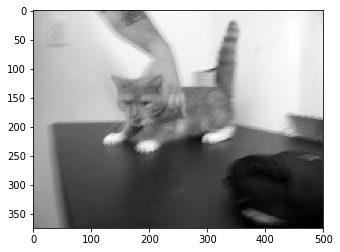

(375, 500)


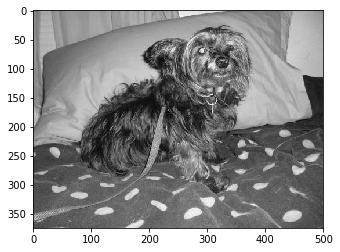

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
import numpy as np


img = mpimg.imread('images/cat/0.jpg').mean(axis=2)
print(img.shape)
plt.figure(1)
plt.imshow(img,cmap='gray')
plt.show()

img = mpimg.imread('images/dog/0.jpg').mean(axis=2)
print(img.shape)
plt.figure(3)
plt.imshow(img,cmap='gray')
plt.show()


# pip install imageio

import imageio
from skimage.transform import resize

import warnings
warnings.filterwarnings("ignore")

def readData(dirimg):
    nbfiles = 200
    halfnbfiles=int(nbfiles/2)
    resizew=28
    resizeh=14
    featuresize=resizew*resizeh
    print("nb files=",nbfiles)
    features = np.zeros((nbfiles, featuresize))
    veclabels = np.zeros((nbfiles, 1))
    images =[]

    for i in range(0,halfnbfiles):
        image = imageio.imread(dirimg + '/' + "cat/"+str(i)+".jpg").mean(axis=2)
        images.append(image)
        image = resize(image, (resizew, resizeh))
        features[i, :] = image.reshape((featuresize))
        veclabels[i] = 1
    
   
    for i in range(0,halfnbfiles):
        image = imageio.imread(dirimg + '/' + "dog/"+str(i)+".jpg").mean(axis=2)
        images.append(image)
        image = resize(image, (resizew, resizeh))
        features[i+halfnbfiles, :] = image.reshape((featuresize))
        veclabels[i+halfnbfiles] = 0
     
   
    #on rajoute le biais
    ones = np.ones((nbfiles,1))
    features=np.hstack([features,ones])

    nbtrain=int(nbfiles * 0.75)
    nbtest=int(nbfiles * 0.25)
    setindex=[]
    for i in range(0,nbfiles):
        setindex.append(i)
    np.random.shuffle(setindex)
    trainfeatures=features[setindex[0:nbtrain]]
    testfeatures=features[setindex[nbtrain:nbtrain+nbtest]]
    trainlabels=veclabels[setindex[0:nbtrain]]
    testlabels=veclabels[setindex[nbtrain:nbtrain+nbtest]]
    trainimages=[]
    for i in range(0,nbtrain):
        trainimages.append(images[setindex[i]])
        
    testimages=[]
    for i in range(nbtrain,nbtrain+nbtest):
        testimages.append(images[setindex[i]])
    
    return (trainfeatures, trainlabels,testfeatures,testlabels,trainimages,testimages)
    

nb files= 200


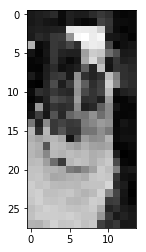

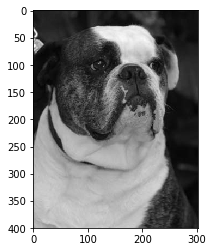

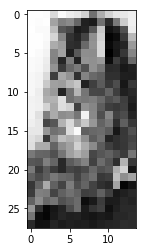

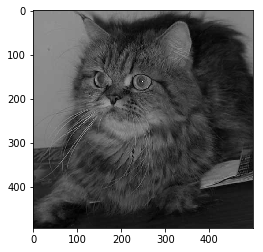

[37.17857143 41.28571429 49.75595238 20.23809524 40.49914966 34.51190476
 35.33333333 49.02210884 62.19982993]
dimension de x= 393
[0.]
(150, 1)
(150, 393)
(50, 1)
(50, 393)


In [77]:
# an example how to use it
dirimg="./images"

trainfeatures, trainlabels,testfeatures,testlabels,trainimages,testimages=readData(dirimg)

X=trainfeatures
T=trainlabels
images=trainimages

Xtest=testfeatures
Ttest=testlabels


#Display the image in low resolution the one that we use for learning and classification
plt.imshow(X[0,0:28*14].reshape((28, 14)), 
           interpolation='nearest', 
           cmap='gray')
plt.show()


#Display the originial image
plt.imshow(images[0], 
           interpolation='nearest', 
           cmap='gray')
plt.show()


#Display the image in low resolution the one that we use for learning and classification
plt.imshow(X[100,0:28*14].reshape((28, 14)), 
           interpolation='nearest', 
           cmap='gray')
plt.show()


#Display the originial image
plt.imshow(images[100], 
           interpolation='nearest', 
           cmap='gray')
plt.show()

print(X[0,1:10])
nbdim=len(X[0,])
print("dimension de x=",nbdim)
print(T[0,:])
print(T.shape)
print(X.shape)
print(testlabels.shape)
print(testfeatures.shape)


# Let us do the training

In [74]:
W=np.zeros((nbdim,1))
pas=0.00000001
nbiter=10
print('Learning rate :',pas)
print('Nb iteration : ',nbiter)
W, error =gradientdescent(X,Y,W,pas,nbiter)

Learning rate : 1e-08
Nb iteration :  10
Iteration number  0
Error :  0.6931471805599454
Iteration number  1
Error :  0.6909802700079228
Iteration number  2
Error :  0.6888495452689642
Iteration number  3
Error :  0.6867990675396816
Iteration number  4
Error :  0.6847807930320226
Iteration number  5
Error :  0.682829885556917
Iteration number  6
Error :  0.6809081416991795
Iteration number  7
Error :  0.6790435288573204
Iteration number  8
Error :  0.6772057030788855
Iteration number  9
Error :  0.6754167778812645


# Let's do the classification on the training data

In [78]:
prediction=sigmoid(X.dot(W))
bonneclassif=np.mean(T==np.round(prediction))
print("Classification rate=",bonneclassif)

Classification rate= 0.6


# Let's do the classification on the testing data


In [79]:
prediction=sigmoid(Xtest.dot(W))
bonneclassif=np.mean(Ttest==np.round(prediction))
print("Classification rate=",bonneclassif)


Classification rate= 0.7


# Conclusion

### We showed that minimizing the cross entropy is equivalent to maximizing the likelihood in case of discriminative models.
### We showed that minimizing the cross entropy is equivalent to minimizing the Kullback–Leibler divergence

### We showed that the cross entropy loss makes the logistic regression problem convex
### We presented an application cats and dogs image classification
